# Pycaret

In this notebook, I create models and predict by using [Pycaret](https://pycaret.org/),low-code machine learning library.
And this [github](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb) help you getting started and understand with Binary Classification using the 'pycaret.classification' module. 

In [ ]:
#Installing PyCaret
!pip install pycaret

In [1]:
!python -V

Python 3.9.7


In [ ]:
!pip show pycaret

## Getting the data

In [38]:
import pandas as pd
train = pd.read_csv('../input/titanic/train.csv')
data_unseen = pd.read_csv('../input/titanic/test.csv')
sub = pd.read_csv('../input/titanic/gender_submission.csv')

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Check the data

In [5]:
import pandas_profiling
train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Import pycaret.classification

In [7]:
from pycaret.classification import *

# target = 'objective variable'
exp = setup(data = train, target = 'Survived', session_id=123)

> Target Type : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

## Comparing all models

In [8]:
compare_models()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4126, splitter='best')

## Create models

In [15]:
# normal decision tree is best at only this time
dt = create_model('dt')

In [10]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4126, splitter='best')


In [11]:
# Other side, lightgbm model for comparison
lgb = create_model('lightgbm')

In [12]:
print(lgb)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4126, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Tune models

In [16]:
tuned_dt = tune_model(dt)

In [17]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4126, splitter='best')


In [18]:
tuned_lgb = tune_model(lgb)

## Plot a model

In [23]:
%matplotlib inline

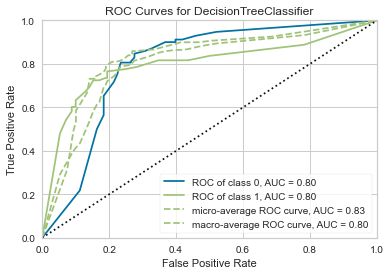

In [24]:
plot_model(tuned_dt, plot = 'auc')

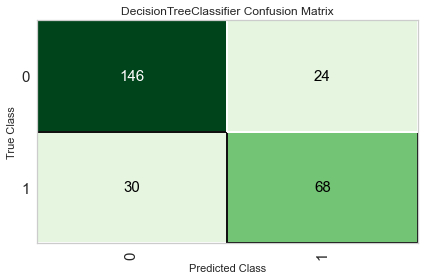

In [25]:
plot_model(tuned_dt, plot = 'confusion_matrix')

### evaluete_model()
evaluate_model() function which displays a user interface for all of the available plots for a given model.

In [26]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
evaluate_model(tuned_lgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Finalize model and Predict on test

In [29]:
final_dt = finalize_model(tuned_dt)
result_dt = predict_model(final_dt, data = data_unseen)

In [30]:
result_dt

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0              330911    7.8292   NaN        Q   
1    female  47.0      1      0              363272    7.0000   NaN        S   
2      male  62.0      0      0              240276    9.6875   NaN        Q   
3      male  27.0      0      0              315154    8.6625   NaN        S   
4    female  22.0      1      1             3101298   12.2875   NaN        S   
..      ...   ...    ...    ...                 ...       ...   ...      ...   
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S   
414  female  39.0      0      0            PC 17758  108.9000  C105        C   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
416    male   NaN      0      0              359309    8.0500   NaN        S   
417    male   NaN      1      1                2668   22.3583   NaN        C   

     Label   Score  
0        0  1.0000  
1        0  0.8571  
2        0  0.9151  
3        0  0.9151  
4        1  0.7500  
..     ...     ...  
413      0  0.9151  
414      1  1.0000  
415      0  1.0000  
416      0  0.9151  
417      0  0.5000  

[418 rows x 13 columns]

In [31]:
final_lgb = finalize_model(tuned_lgb)
result_lgb = predict_model(final_lgb, data = data_unseen)

In [34]:
result_lgb["Label"]

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Label, Length: 418, dtype: int64

## Submit predicts

In [35]:
y_pred = result_dt["Label"]

In [40]:
sub['Survived'] = y_pred
sub.to_csv('submission_dt.csv', index=False)

#### the score of dt is 0.75358

In [41]:
y_pred2 = result_lgb["Label"]
sub['Survived'] = y_pred2
sub.to_csv('submission_lgb.csv', index=False)

#### the score of lgb is 0.74641